<a href="https://colab.research.google.com/github/DanhNguyen21/DanhNguyen21/blob/main/Nh%E1%BA%ADn_d%E1%BA%A1ng_10_tr%C3%A1i_c%C3%A2y_b%E1%BA%A3n_ch%C3%ADnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Công Danh - 19146164
Lớp AI tối thứ 7
Link google drive: https://drive.google.com/drive/folders/1FsLyeo6H6uvSzNj3BEwPuIjBnEvWE2LV?usp=sharing

In [3]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [6]:
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Trâiicay/Train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 330 images belonging to 11 classes.


In [7]:
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Trâiicay/Test',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 330 images belonging to 11 classes.


In [8]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [9]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [10]:
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
11/11 [==============================] - 116s 11s/step - loss: 5.2648 - accuracy: 0.1485 - val_loss: 2.2637 - val_accuracy: 0.1848
Epoch 2/100
11/11 [==============================] - 6s 604ms/step - loss: 2.2478 - accuracy: 0.1970 - val_loss: 2.0768 - val_accuracy: 0.2030
Epoch 3/100
11/11 [==============================] - 6s 613ms/step - loss: 1.9452 - accuracy: 0.2909 - val_loss: 1.6889 - val_accuracy: 0.3909
Epoch 4/100
11/11 [==============================] - 6s 607ms/step - loss: 1.5664 - accuracy: 0.4606 - val_loss: 1.2176 - val_accuracy: 0.5182
Epoch 5/100
11/11 [==============================] - 6s 611ms/step - loss: 1.5517 - accuracy: 0.4576 - val_loss: 1.1096 - val_accuracy: 0.6364
Epoch 6/100
11/11 [==============================] - 6s 601ms/step - loss: 1.2150 - accuracy: 0.6152 - val_loss: 1.0568 - val_accuracy: 0.6970
Epoch 7/100
11/11 [==============================] - 6s 602ms/step - loss: 1.1232 - accuracy: 0.6303 - val_loss: 0.8504 - val_accuracy: 0.7061

Sai số kiểm tra là:  0.02379385568201542
Độ chính xác kiểm tra là:  0.9939393997192383


<function matplotlib.pyplot.show>

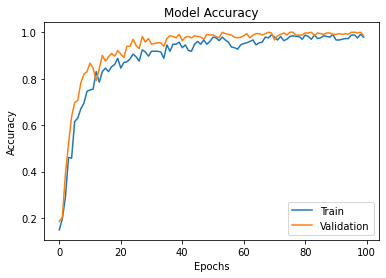

In [11]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [12]:
model.save('model_nhan_dien_trai_cay.h5')
model=load_model('model_nhan_dien_trai_cay.h5')

In [13]:
training_data.class_indices

{'Dưa hấu': 0,
 'Mango': 1,
 'Trái dừa': 2,
 'Vải': 3,
 'chuoi': 4,
 'dautay': 5,
 'khe': 6,
 'mangcut': 7,
 'nho': 8,
 'tao': 9,
 'traithom': 10}

Táo


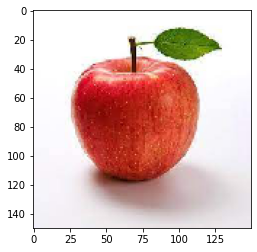

In [14]:
img=load_img("/content/tải xuống (6).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Dưa hấu'
if round(result[0][1])==1:
  prediction='Xoài'
if round(result[0][2])==1:
  prediction='Dừa'
if round(result[0][3])==1:
  prediction='Vải'
if round(result[0][4])==1:
  prediction='Chuối'
if round(result[0][5])==1:
  prediction='Dâu tây'
if round(result[0][6])==1:
  prediction='Khế'
if round(result[0][7])==1:
  prediction='Măng cụt'
if round(result[0][8])==1:
  prediction='Nho'
if round(result[0][9])==1:
  prediction='Táo'
if round(result[0][10])==1:
  prediction='Thơm'
print(prediction)

Thơm


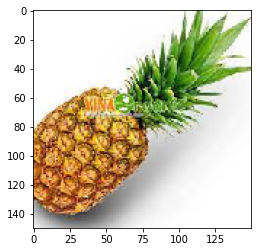

In [15]:
img=load_img("/content/tải xuống (2).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Dưa hấu'
if round(result[0][1])==1:
  prediction='Xoài'
if round(result[0][2])==1:
  prediction='Dừa'
if round(result[0][3])==1:
  prediction='Vải'
if round(result[0][4])==1:
  prediction='Chuối'
if round(result[0][5])==1:
  prediction='Dâu tây'
if round(result[0][6])==1:
  prediction='Khế'
if round(result[0][7])==1:
  prediction='Măng cụt'
if round(result[0][8])==1:
  prediction='Nho'
if round(result[0][9])==1:
  prediction='Táo'
if round(result[0][10])==1:
  prediction='Thơm'
print(prediction)

Dừa


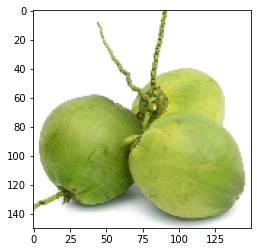

In [16]:
img=load_img("/content/467560fdac39bbb55177fe9771083dab.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Dưa hấu'
if round(result[0][1])==1:
  prediction='Xoài'
if round(result[0][2])==1:
  prediction='Dừa'
if round(result[0][3])==1:
  prediction='Vải'
if round(result[0][4])==1:
  prediction='Chuối'
if round(result[0][5])==1:
  prediction='Dâu tây'
if round(result[0][6])==1:
  prediction='Khế'
if round(result[0][7])==1:
  prediction='Măng cụt'
if round(result[0][8])==1:
  prediction='Nho'
if round(result[0][9])==1:
  prediction='Táo'
if round(result[0][10])==1:
  prediction='Thơm'
print(prediction)

Khế


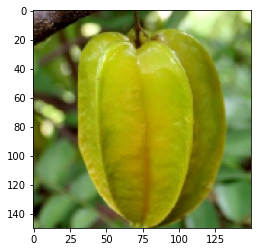

In [18]:
img=load_img("/content/khế.png",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Dưa hấu'
if round(result[0][1])==1:
  prediction='Xoài'
if round(result[0][2])==1:
  prediction='Dừa'
if round(result[0][3])==1:
  prediction='Vải'
if round(result[0][4])==1:
  prediction='Chuối'
if round(result[0][5])==1:
  prediction='Dâu tây'
if round(result[0][6])==1:
  prediction='Khế'
if round(result[0][7])==1:
  prediction='Măng cụt'
if round(result[0][8])==1:
  prediction='Nho'
if round(result[0][9])==1:
  prediction='Táo'
if round(result[0][10])==1:
  prediction='Thơm'
print(prediction)

Xoài


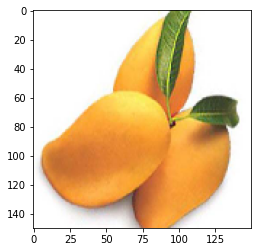

In [21]:
img=load_img("/content/suckhoe12-7e77e.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Dưa hấu'
if round(result[0][1])==1:
  prediction='Xoài'
if round(result[0][2])==1:
  prediction='Dừa'
if round(result[0][3])==1:
  prediction='Vải'
if round(result[0][4])==1:
  prediction='Chuối'
if round(result[0][5])==1:
  prediction='Dâu tây'
if round(result[0][6])==1:
  prediction='Khế'
if round(result[0][7])==1:
  prediction='Măng cụt'
if round(result[0][8])==1:
  prediction='Nho'
if round(result[0][9])==1:
  prediction='Táo'
if round(result[0][10])==1:
  prediction='Thơm'
print(prediction)

Vải


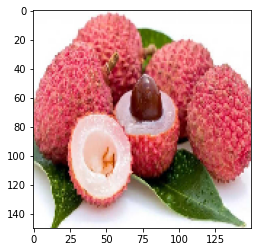

In [25]:
img=load_img("/content/qua-vai-tuoi.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Dưa hấu'
if round(result[0][1])==1:
  prediction='Xoài'
if round(result[0][2])==1:
  prediction='Dừa'
if round(result[0][3])==1:
  prediction='Vải'
if round(result[0][4])==1:
  prediction='Chuối'
if round(result[0][5])==1:
  prediction='Dâu tây'
if round(result[0][6])==1:
  prediction='Khế'
if round(result[0][7])==1:
  prediction='Măng cụt'
if round(result[0][8])==1:
  prediction='Nho'
if round(result[0][9])==1:
  prediction='Táo'
if round(result[0][10])==1:
  prediction='Thơm'
print(prediction)

Nho


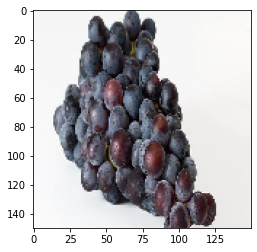

In [26]:
img=load_img("/content/1nho_den_6677263_26112019.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Dưa hấu'
if round(result[0][1])==1:
  prediction='Xoài'
if round(result[0][2])==1:
  prediction='Dừa'
if round(result[0][3])==1:
  prediction='Vải'
if round(result[0][4])==1:
  prediction='Chuối'
if round(result[0][5])==1:
  prediction='Dâu tây'
if round(result[0][6])==1:
  prediction='Khế'
if round(result[0][7])==1:
  prediction='Măng cụt'
if round(result[0][8])==1:
  prediction='Nho'
if round(result[0][9])==1:
  prediction='Táo'
if round(result[0][10])==1:
  prediction='Thơm'
print(prediction)

Măng cụt


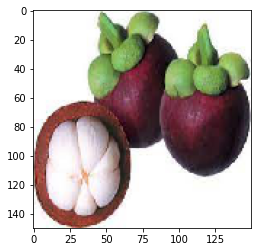

In [28]:
img=load_img("/content/tải xuống (7).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Dưa hấu'
if round(result[0][1])==1:
  prediction='Xoài'
if round(result[0][2])==1:
  prediction='Dừa'
if round(result[0][3])==1:
  prediction='Vải'
if round(result[0][4])==1:
  prediction='Chuối'
if round(result[0][5])==1:
  prediction='Dâu tây'
if round(result[0][6])==1:
  prediction='Khế'
if round(result[0][7])==1:
  prediction='Măng cụt'
if round(result[0][8])==1:
  prediction='Nho'
if round(result[0][9])==1:
  prediction='Táo'
if round(result[0][10])==1:
  prediction='Thơm'
print(prediction)

Chuối


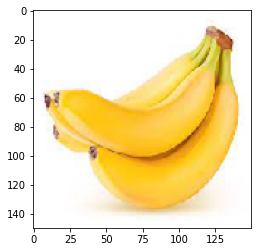

In [29]:
img=load_img("/content/tải xuống (8).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Dưa hấu'
if round(result[0][1])==1:
  prediction='Xoài'
if round(result[0][2])==1:
  prediction='Dừa'
if round(result[0][3])==1:
  prediction='Vải'
if round(result[0][4])==1:
  prediction='Chuối'
if round(result[0][5])==1:
  prediction='Dâu tây'
if round(result[0][6])==1:
  prediction='Khế'
if round(result[0][7])==1:
  prediction='Măng cụt'
if round(result[0][8])==1:
  prediction='Nho'
if round(result[0][9])==1:
  prediction='Táo'
if round(result[0][10])==1:
  prediction='Thơm'
print(prediction)

Dưa hấu


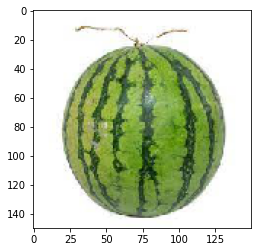

In [30]:
img=load_img("/content/tải xuống (9).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Dưa hấu'
if round(result[0][1])==1:
  prediction='Xoài'
if round(result[0][2])==1:
  prediction='Dừa'
if round(result[0][3])==1:
  prediction='Vải'
if round(result[0][4])==1:
  prediction='Chuối'
if round(result[0][5])==1:
  prediction='Dâu tây'
if round(result[0][6])==1:
  prediction='Khế'
if round(result[0][7])==1:
  prediction='Măng cụt'
if round(result[0][8])==1:
  prediction='Nho'
if round(result[0][9])==1:
  prediction='Táo'
if round(result[0][10])==1:
  prediction='Thơm'
print(prediction)